In [14]:
import os
import pandas as pd
from dirs import ROOT_DIR, make_dir
from __future__ import (absolute_import, division, print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import seaborn as sns

logs_relative_path = r'weights/cell20180412T2356/logs.csv'
# config_relative_path = r'src/nn_var/mask_rcnn/logs/cell20180222T1549/mask_rcnn-20_ep-0.2_vs-imagenet_iw-heads_l.csv'

df = pd.read_csv(os.path.join(ROOT_DIR, logs_relative_path))
# df = pd.read_csv()
print(df[:50])

Populating the interactive namespace from numpy and matplotlib
    epoch      loss  mrcnn_bbox_loss  mrcnn_class_loss  mrcnn_mask_loss  \
0       0  1.366851         0.258185          0.329487         0.261457   
1       1  1.095481         0.187670          0.288324         0.246486   
2       2  1.040028         0.178515          0.281066         0.246287   
3       3  1.006972         0.169872          0.273158         0.241158   
4       4  0.967350         0.164462          0.264405         0.237043   
5       5  0.958180         0.161870          0.262785         0.233249   
6       6  0.944655         0.158953          0.265187         0.234954   
7       7  0.929426         0.156314          0.260637         0.231737   
8       8  0.917391         0.155221          0.257133         0.231771   
9       9  0.917546         0.155767          0.256816         0.231188   
10     10  0.907194         0.152039          0.255662         0.229605   
11     11  0.899695         0.152077 

In [9]:
df['loss'] = df['loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['mrcnn_bbox_loss'] = df['mrcnn_bbox_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['mrcnn_mask_loss'] = df['mrcnn_mask_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['val_loss'] = df['val_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['val_mrcnn_bbox_loss'] = df['val_mrcnn_bbox_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['val_mrcnn_mask_loss'] = df['val_mrcnn_mask_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)


AttributeError: 'float' object has no attribute 'lstrip'

In [15]:
mask_loss_df = df[[x for x in df.columns if 'mrcnn_mask_loss' in x] + ['epoch']]
print(mask_loss_df)

    mrcnn_mask_loss  val_mrcnn_mask_loss  epoch
0          0.261457             0.226385      0
1          0.246486             0.236052      1
2          0.246287             0.235814      2
3          0.241158             0.275235      3
4          0.237043             0.192132      4
5          0.233249             0.259130      5
6          0.234954             0.214318      6
7          0.231737             0.215847      7
8          0.231771             0.239640      8
9          0.231188             0.219590      9
10         0.229605             0.193036     10
11         0.228773             0.243730     11
12         0.232932             0.211609     12
13         0.226920             0.238992     13
14         0.226566             0.278054     14
15         0.228784             0.211517     15
16         0.224505             0.171375     16
17         0.227610             0.248111     17
18         0.222719             0.226868     18
19         0.225114             0.205749

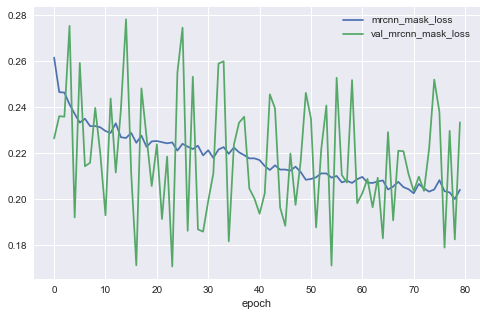

In [16]:
mask_loss_df.groupby('epoch').sum().plot()